m1  correct predictions more often
m1   correctly identify positive instances

 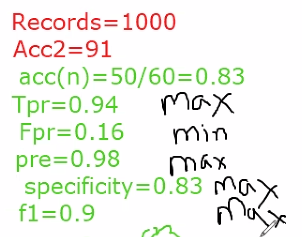

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv(r'C:\Users\Anuja\Music\New folder\Credit_Risk_data.csv')

In [5]:
df.shape

(614, 13)

In [6]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [7]:
df.head(10) #0 rural   1 semiurban   2urban

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [8]:
#df.drop(columns="Loan_ID",inplace=True)

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [11]:
df["Gender"].fillna("Female",inplace=True)

In [12]:
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [13]:
df["Dependents"].fillna("3+",inplace=True)

In [14]:
df["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [15]:
df["Married"].fillna("No",inplace=True)

In [16]:
df["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [17]:
df["Self_Employed"].fillna("Yes",inplace=True)

In [18]:
df["LoanAmount"].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [19]:
df["LoanAmount"].fillna(df["LoanAmount"].median(),inplace=True)

In [20]:
df["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [21]:
df["Loan_Amount_Term"].fillna(12.0,inplace=True)

In [22]:
df["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [23]:
df["Credit_History"].fillna(0.0,inplace=True)

In [24]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [25]:
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

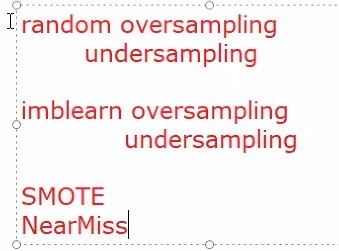

In [26]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [28]:
df.Gender=le.fit_transform(df.Gender)

In [29]:
df.Married=le.fit_transform(df.Married)

In [30]:
df.Dependents=le.fit_transform(df.Dependents)

In [31]:
df.Education=le.fit_transform(df.Education)

In [32]:
df.Loan_Status=le.fit_transform(df.Loan_Status)

In [33]:
df.Property_Area=le.fit_transform(df.Property_Area)

In [34]:
df.Self_Employed=le.fit_transform(df.Self_Employed)

In [35]:
df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [36]:
df["CoapplicantIncome"]=df["CoapplicantIncome"].astype("int32")
df["LoanAmount"]=df["LoanAmount"].astype("int32")
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].astype("int32")
df["Credit_History"]=df["Credit_History"].astype("int32")

In [37]:
df.dtypes

Loan_ID              object
Gender                int32
Married               int32
Dependents            int32
Education             int32
Self_Employed         int32
ApplicantIncome       int64
CoapplicantIncome     int32
LoanAmount            int32
Loan_Amount_Term      int32
Credit_History        int32
Property_Area         int32
Loan_Status           int32
dtype: object

In [38]:
df["Property_Area"].unique()

array([2, 0, 1])

In [39]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0,128,360,1,2,1
1,LP001003,1,1,1,0,0,4583,1508,128,360,1,0,0
2,LP001005,1,1,0,0,1,3000,0,66,360,1,2,1
3,LP001006,1,1,0,1,0,2583,2358,120,360,1,2,1
4,LP001008,1,0,0,0,0,6000,0,141,360,1,2,1
5,LP001011,1,1,2,0,1,5417,4196,267,360,1,2,1
6,LP001013,1,1,0,1,0,2333,1516,95,360,1,2,1
7,LP001014,1,1,3,0,0,3036,2504,158,360,0,1,0
8,LP001018,1,1,2,0,0,4006,1526,168,360,1,2,1
9,LP001020,1,1,1,0,0,12841,10968,349,360,1,1,0


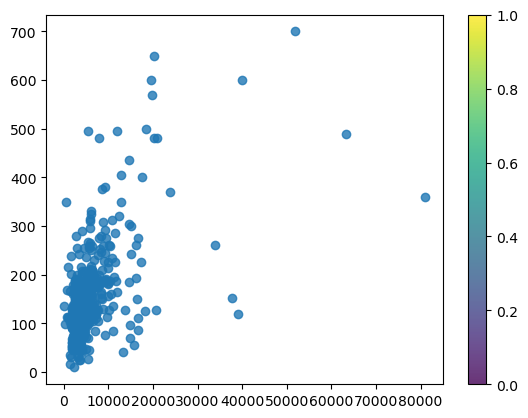

In [40]:
x=df["ApplicantIncome"]
y=df["LoanAmount"]
mycolors=df["Loan_Status"]
plt.scatter(x,y,alpha=0.8)
plt.colorbar()
plt.show()

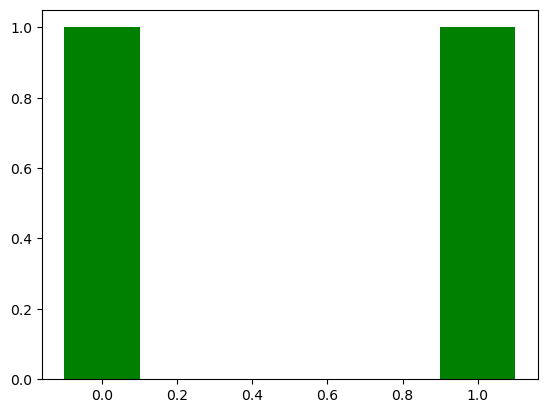

In [41]:
x=df["Education"]
y=df["Loan_Status"]
plt.bar(x,y,color="green",width=0.2) # plt.barh(x,y) <= for horizontal graphss
plt.show() # default width=0.8

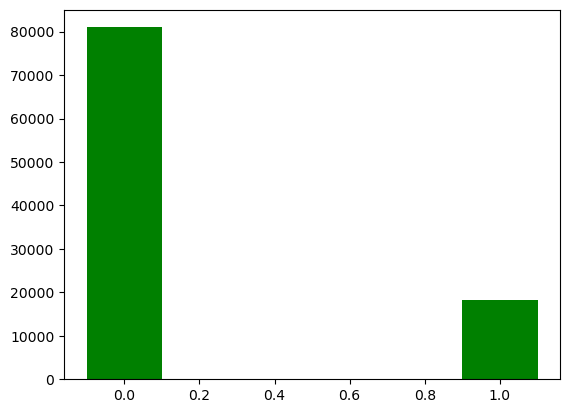

In [42]:
x=df["Education"]
y=df["ApplicantIncome"]
plt.bar(x,y,color="green",width=0.2) # plt.barh(x,y) <= for horizontal graphss
plt.show()

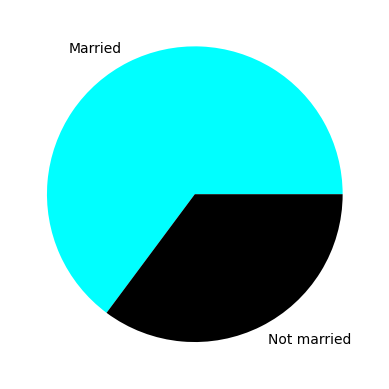

In [43]:
x=df["Married"].value_counts()
y=["Married","Not married"]
mycolors=["cyan","black"]
plt.pie(x,labels=y,colors=mycolors)
plt.show()

In [44]:
df["Property_Area"].value_counts() #  0 rural   1 semiurban   2 urban

1    233
2    202
0    179
Name: Property_Area, dtype: int64

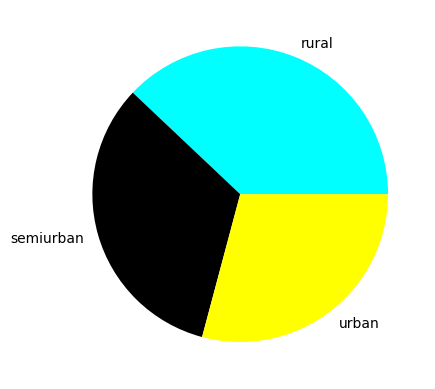

In [45]:
x=df["Property_Area"].value_counts()
#lb=df["Loan_Status"]
lb=["rural","semiurban","urban"]
mycolors=["cyan","black","Yellow"]
plt.pie(x,labels=lb,colors=mycolors)
plt.show()

In [46]:
corr1 = df.corr()
corr1

C:\Users\Anuja\AppData\Local\Temp\ipykernel_7592\3168523071.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr1 = df.corr()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.339026,0.141975,0.061497,-0.039440,0.013933,0.082316,0.063245,-0.053248,0.035780,-0.017054,0.025407
Married,0.339026,1.000000,0.307667,0.017671,-0.016628,0.050194,0.080496,0.145717,-0.081051,-0.023626,0.000395,0.084281
Dependents,0.141975,0.307667,1.000000,0.061179,0.030808,0.110073,0.016073,0.140926,-0.037612,-0.034355,0.025773,-0.003391
Education,0.061497,0.017671,0.061179,1.000000,-0.019059,-0.140760,-0.062290,-0.168759,-0.108617,-0.081637,-0.065243,-0.085884
Self_Employed,-0.039440,-0.016628,0.030808,-0.019059,1.000000,0.121356,0.028834,0.112103,-0.038786,-0.001923,-0.022732,0.005857
ApplicantIncome,0.013933,0.050194,0.110073,-0.140760,0.121356,1.000000,-0.116604,0.565181,-0.016562,0.006986,-0.009500,-0.004710
CoapplicantIncome,0.082316,0.080496,0.016073,-0.062290,0.028834,-0.116604,1.000000,0.189218,-0.050877,-0.058796,0.010521,-0.059188
LoanAmount,0.063245,0.145717,0.140926,-0.168759,0.112103,0.565181,0.189218,1.000000,0.063794,-0.034473,-0.046632,-0.033214
Loan_Amount_Term,-0.053248,-0.081051,-0.037612,-0.108617,-0.038786,-0.016562,-0.050877,0.063794,1.000000,0.049195,-0.082497,0.006561
Credit_History,0.035780,-0.023626,-0.034355,-0.081637,-0.001923,0.006986,-0.058796,-0.034473,0.049195,1.000000,-0.018761,0.432616


In [47]:
# 1.Gender is not related to loan_status
# 2.loan status is highly correlated with credit history
# 

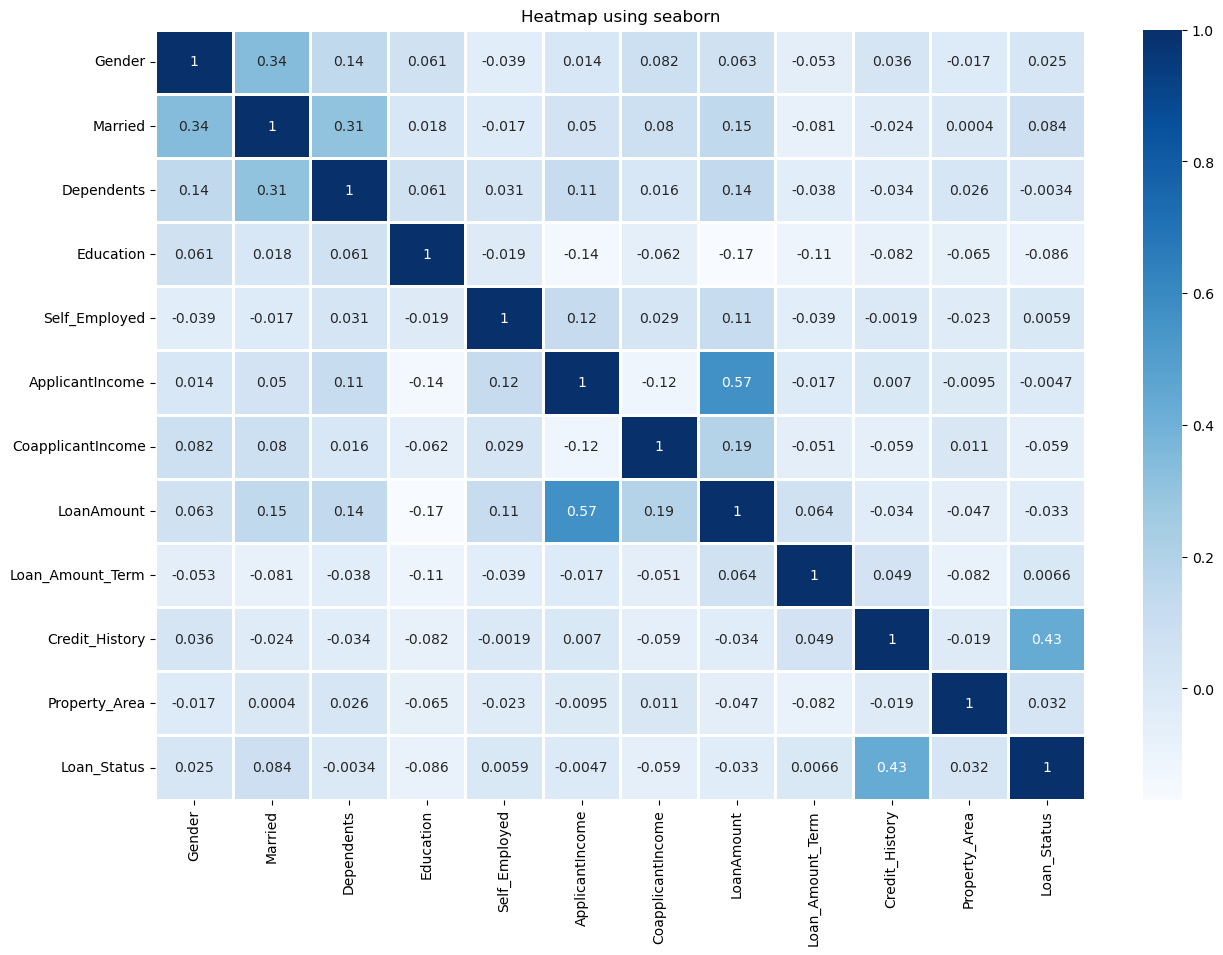

In [48]:
plt.figure(figsize=(15,10))
heatmap=sns.heatmap(corr1,linewidth=1,annot=True,cmap=plt.cm.Blues)
plt.title("Heatmap using seaborn")
plt.show()

In [49]:
df.drop("Loan_ID", axis=1, inplace=False)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0,128,360,1,2,1
1,1,1,1,0,0,4583,1508,128,360,1,0,0
2,1,1,0,0,1,3000,0,66,360,1,2,1
3,1,1,0,1,0,2583,2358,120,360,1,2,1
4,1,0,0,0,0,6000,0,141,360,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0,71,360,1,0,1
610,1,1,3,0,0,4106,0,40,180,1,0,1
611,1,1,1,0,0,8072,240,253,360,1,2,1
612,1,1,2,0,0,7583,0,187,360,1,2,1


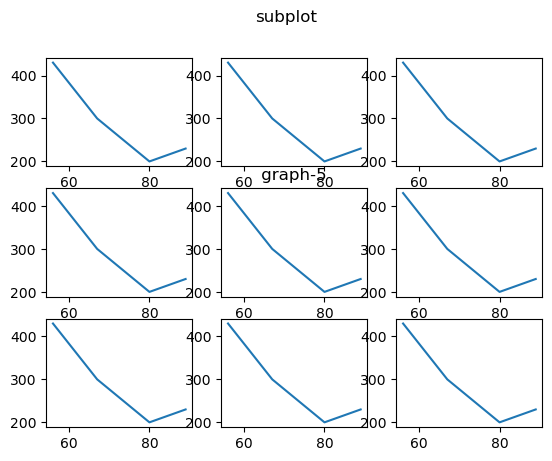

In [50]:
#plot1
x=np.array([89,80,67,56])
y=np.array([230,200,300,430])

plt.subplot(3,3,1) #row , col , graphno
plt.plot(x,y)
           
#plot2
x=np.array([89,80,67,56])
y=np.array([230,200,300,430])

plt.subplot(3,3,2)
plt.plot(x,y)

#plot3
x=np.array([89,80,67,56])
y=np.array([230,200,300,430])

plt.subplot(3,3,3)
plt.plot(x,y)

#plot4
x=np.array([89,80,67,56])
y=np.array([230,200,300,430])

plt.subplot(3,3,4)
plt.plot(x,y)

#plot5
x=np.array([89,80,67,56])
y=np.array([230,200,300,430])

plt.subplot(3,3,5)
plt.title(" graph-5 ")
plt.plot(x,y)

#plot6
x=np.array([89,80,67,56])
y=np.array([230,200,300,430])

plt.subplot(3,3,6)
plt.plot(x,y)

#plot7
x=np.array([89,80,67,56])
y=np.array([230,200,300,430])

plt.subplot(3,3,7)
plt.plot(x,y)

#plot8
x=np.array([89,80,67,56])
y=np.array([230,200,300,430])

plt.subplot(3,3,8)
plt.plot(x,y)

#plot9
x=np.array([89,80,67,56])
y=np.array([230,200,300,430])

plt.subplot(3,3,9)
plt.plot(x,y)

plt.suptitle("subplot")
plt.show()

## scatter plot

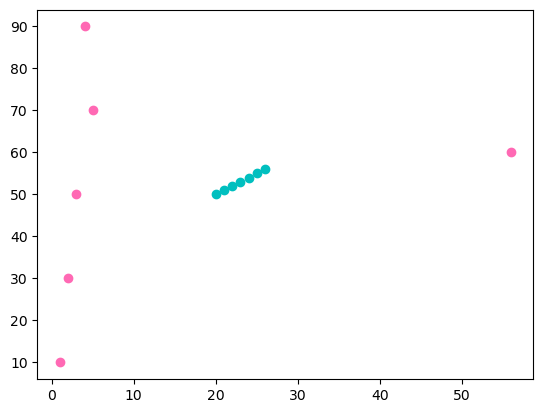

In [51]:
x=np.array([1,2,3,4,56,5])
y=np.array([10,30,50,90,60,70])
plt.scatter(x,y,color="hotpink")

x1=np.arange(20,27)
y1=np.arange(50,57)
plt.scatter(x1,y1,color="c")

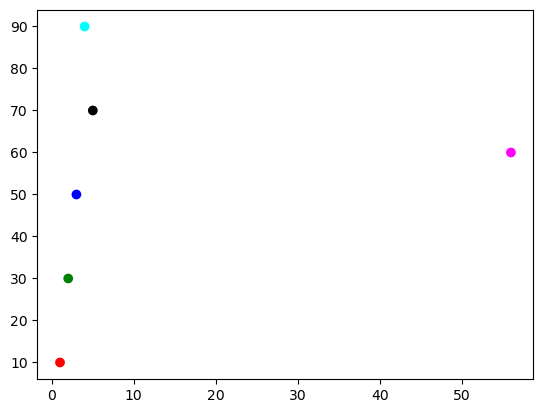

In [52]:
x=np.array([1,2,3,4,56,5])
y=np.array([10,30,50,90,60,70])
colors=np.array(["red","green","blue","cyan","magenta","black"])
plt.scatter(x,y,c=colors)


<function matplotlib.pyplot.show(close=None, block=None)>

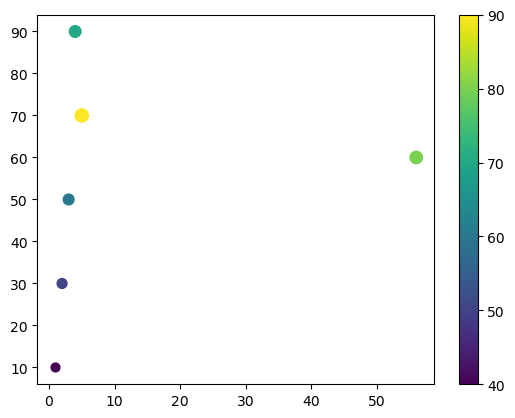

In [53]:
x=np.array([1,2,3,4,56,5])
y=np.array([10,30,50,90,60,70])
color=np.array([40,50,60,70,80,90])
plt.scatter(x,y,color,c=color,cmap="viridis")
plt.colorbar()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

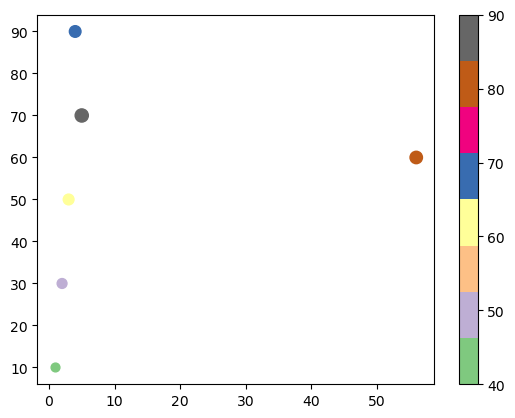

In [54]:
x=np.array([1,2,3,4,56,5])
y=np.array([10,30,50,90,60,70])
color=np.array([40,50,60,70,80,90])
plt.scatter(x,y,color,c=color,cmap="Accent")
plt.colorbar()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

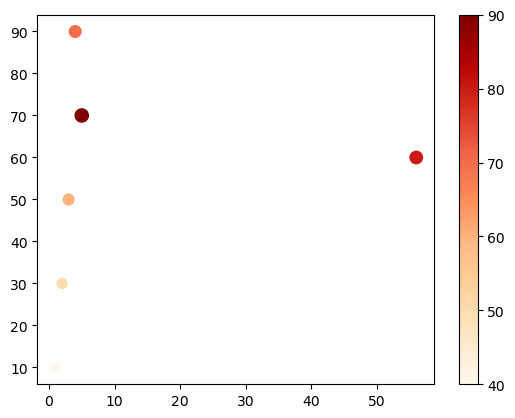

In [55]:
x=np.array([1,2,3,4,56,5])
y=np.array([10,30,50,90,60,70])
color=np.array([40,50,60,70,80,90])
plt.scatter(x,y,color,c=color,cmap="OrRd")
plt.colorbar()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

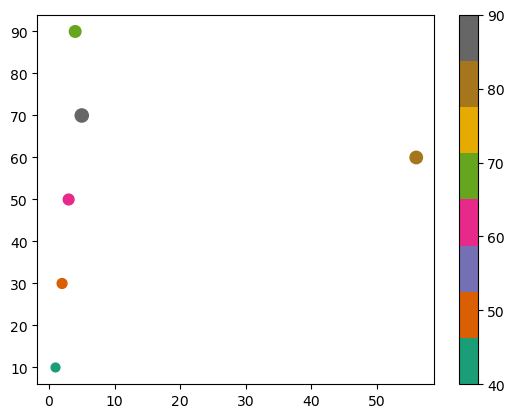

In [56]:
x=np.array([1,2,3,4,56,5])
y=np.array([10,30,50,90,60,70])
color=np.array([40,50,60,70,80,90])
plt.scatter(x,y,color,c=color,cmap="Dark2")
plt.colorbar()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

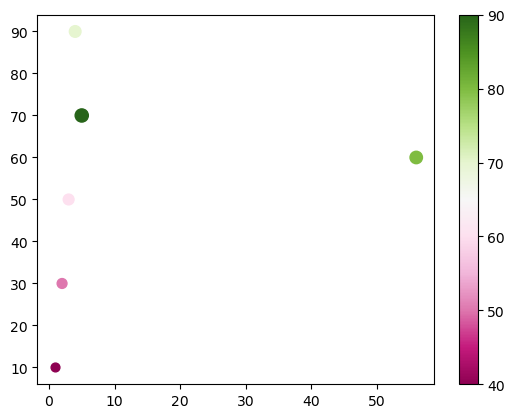

In [57]:
x=np.array([1,2,3,4,56,5])
y=np.array([10,30,50,90,60,70])
color=np.array([40,50,60,70,80,90])
plt.scatter(x,y,color,c=color,cmap="PiYG")
plt.colorbar()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

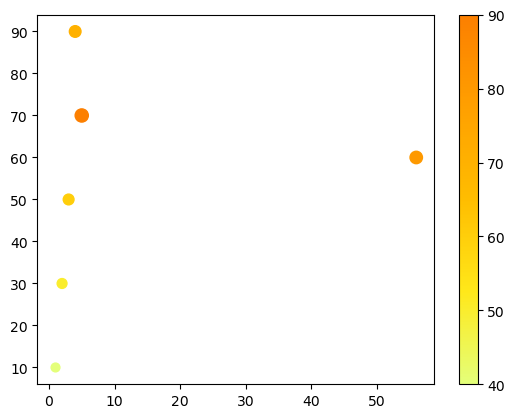

In [58]:
x=np.array([1,2,3,4,56,5])
y=np.array([10,30,50,90,60,70])
color=np.array([40,50,60,70,80,90])
plt.scatter(x,y,color,c=color,cmap="Wistia")
plt.colorbar()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

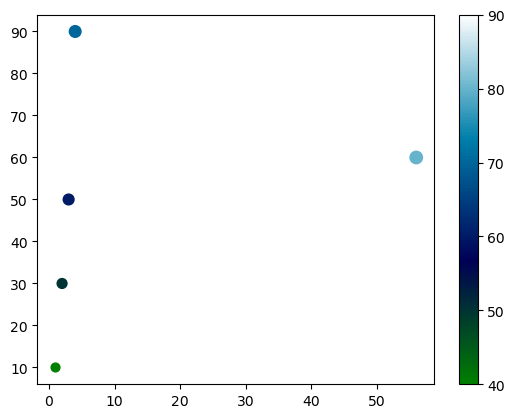

In [59]:
x=np.array([1,2,3,4,56,5])
y=np.array([10,30,50,90,60,70])
color=np.array([40,50,60,70,80,90])
plt.scatter(x,y,color,c=color,cmap="ocean")
plt.colorbar()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

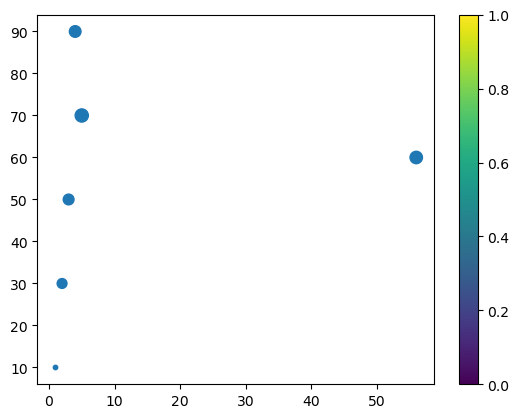

In [60]:
x=np.array([1,2,3,4,56,5])
y=np.array([10,30,50,90,60,70])
size=np.array([10,50,60,70,80,90])
plt.scatter(x,y,s=size)
plt.colorbar()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

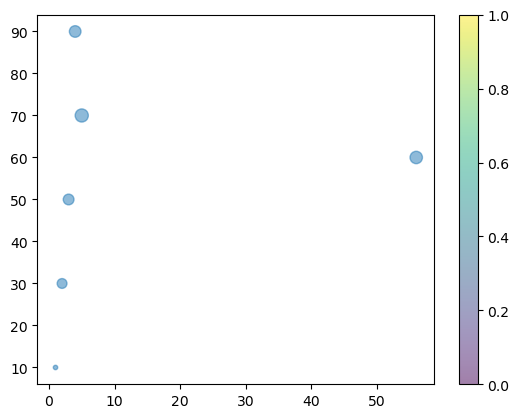

In [61]:
x=np.array([1,2,3,4,56,5])
y=np.array([10,30,50,90,60,70])
size=np.array([10,50,60,70,80,90])
plt.scatter(x,y,s=size,alpha=0.5)
plt.colorbar()
plt.show

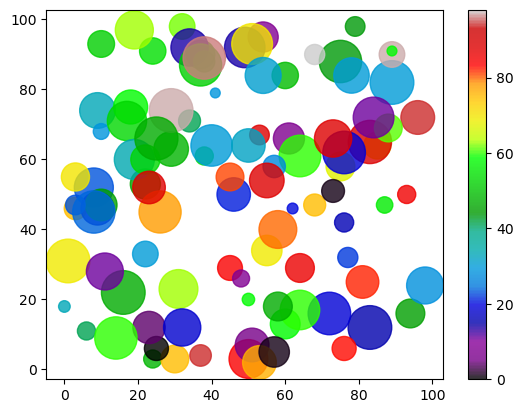

In [62]:
x=np.random.randint(100,size=(100))
y=np.random.randint(100,size=(100))
colors=np.random.randint(100,size=(100))
sizes=10*np.random.randint(100,size=(100))
plt.scatter(x,y,c=colors,s=sizes,alpha=0.8,cmap="nipy_spectral")
plt.colorbar()
plt.show()

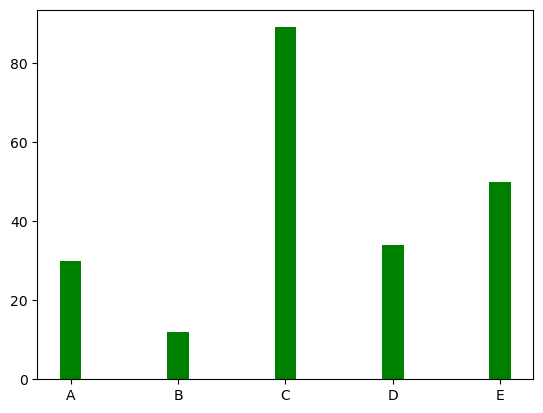

In [63]:
x=np.array(["A","B","C","D","E"])
y=np.array([30,12,89,34,50])
plt.bar(x,y,color="green",width=0.2) # plt.barh(x,y) <= for horizontal graphss
plt.show() # default width=0.8

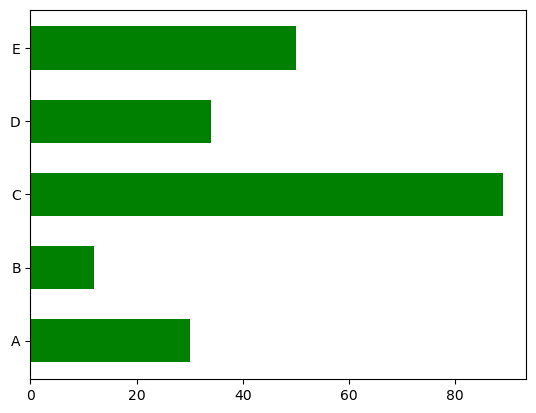

In [64]:
x=np.array(["A","B","C","D","E"])
y=np.array([30,12,89,34,50])
plt.barh(x,y,color="green",height=0.6) # in horizontal=>height not width
plt.show()

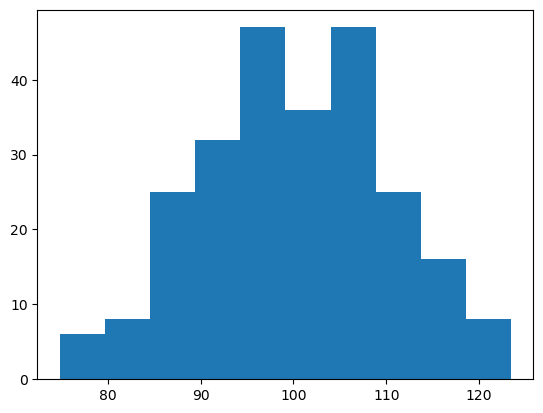

In [65]:
x=np.random.normal(100,10,250)#random.normal(loc=0.0, scale=1.0, size=None)
plt.hist(x)
plt.show()

### piechart

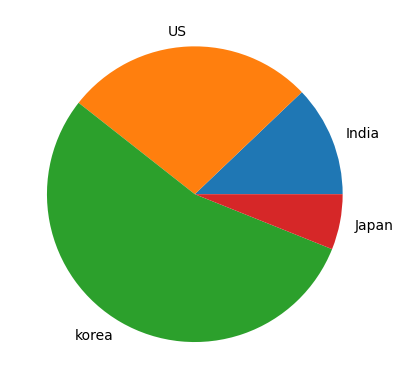

In [66]:
x=np.array([20,45,90,10])
lb=["India","US","korea","Japan"]
plt.pie(x,labels=lb)
plt.show()

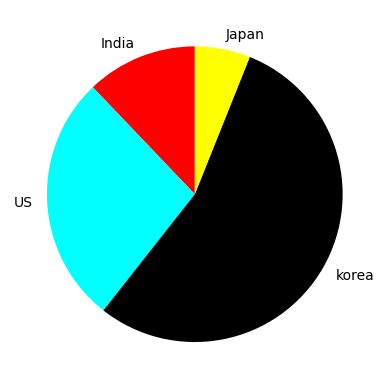

In [67]:
x=np.array([20,45,90,10])
lb=["India","US","korea","Japan"]
mycolors=["red","cyan","black","Yellow"]
plt.pie(x,labels=lb,startangle=90,colors=mycolors)
plt.show()

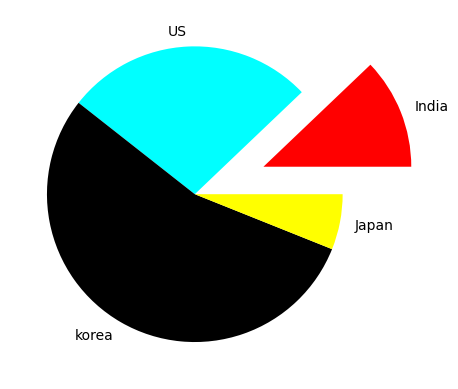

In [68]:
x=np.array([20,45,90,10])
lb=["India","US","korea","Japan"]
mycolors=["red","cyan","black","Yellow"]
myexplode=[0.5,0,0,0]
plt.pie(x,labels=lb,colors=mycolors,explode=myexplode)
plt.show()

In [69]:
import seaborn as sns

In [70]:
t=sns.load_dataset("tips")
t.shape

(244, 7)

In [71]:
t.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


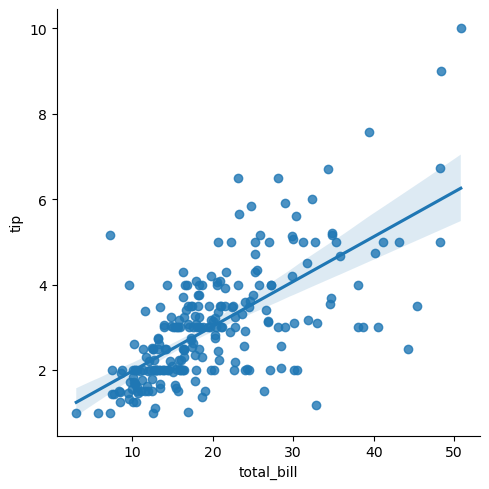

In [72]:
sns.lmplot(data=t,x="total_bill",y="tip")

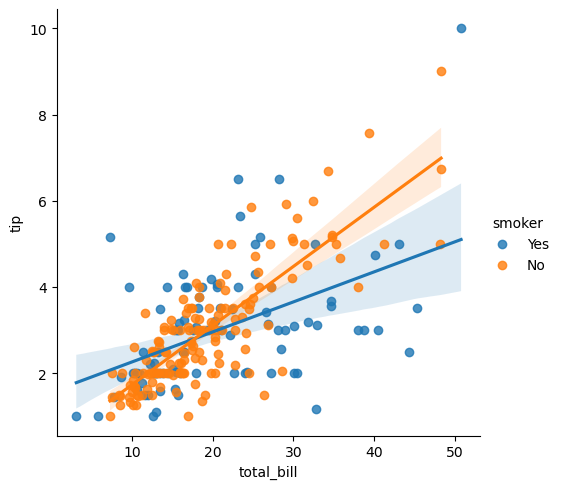

In [73]:
sns.lmplot(data=t,x="total_bill",y="tip",hue="smoker")

In [75]:
#sns.lmplot(data=df,x=df["Education"],hue=df["Loan_Status"])

In [ ]:
sns.displot(data=t,x="total_bill",col="time",kde=True)

In [ ]:
sns.barplot(t,x="time",y="total_bill")

In [ ]:
sns.boxplot(t,x="time",y="total_bill")

In [ ]:
t.boxplot()

In [ ]:
sns.distplot(t["total_bill"],kde=True)

In [ ]:
fig=plt.figure(figsize=(5,5))
sns.boxplot(data=df,y="ApplicantIncome")

In [79]:
df.skew()

C:\Users\Anuja\AppData\Local\Temp\ipykernel_7592\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Gender              -1.475893
Married             -0.622252
Dependents           0.912335
Education            1.367622
Self_Employed        1.620738
ApplicantIncome      6.539513
CoapplicantIncome    7.491530
LoanAmount           2.743053
Loan_Amount_Term    -2.460484
Credit_History      -1.310835
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [80]:
data1=df

In [81]:
data1.CoapplicantIncome.describe()

count      614.00000
mean      1621.24430
std       2926.24876
min          0.00000
25%          0.00000
50%       1188.50000
75%       2297.25000
max      41667.00000
Name: CoapplicantIncome, dtype: float64

In [82]:
IQR=data1.CoapplicantIncome.quantile(0.75)-data1.CoapplicantIncome.quantile(0.25)
IQR

2297.25

In [83]:
ub1=data1.CoapplicantIncome.quantile(0.75)+3*IQR
lb1=data1.CoapplicantIncome.quantile(0.25)-3*IQR
print(ub1,lb1)

9189.0 -6891.75


In [84]:
data1.loc[data1["CoapplicantIncome"]>9189.0,"CoapplicantIncome"]=-6891.75

C:\Users\Anuja\AppData\Local\Temp\ipykernel_7592\773871612.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1.CoapplicantIncome)


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

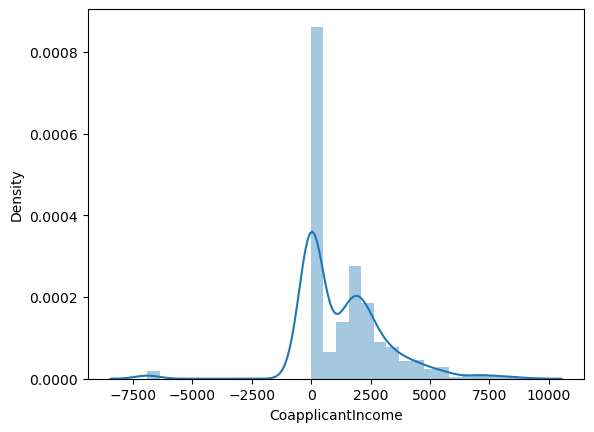

In [85]:
sns.distplot(data1.CoapplicantIncome) 

<Axes: >

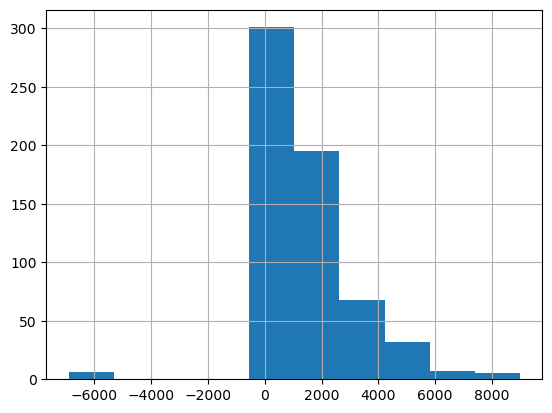

In [86]:
data1.CoapplicantIncome.hist()

In [87]:
df.drop("Loan_ID", axis=1, inplace=False)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128,360,1,2,1
1,1,1,1,0,0,4583,1508.0,128,360,1,0,0
2,1,1,0,0,1,3000,0.0,66,360,1,2,1
3,1,1,0,1,0,2583,2358.0,120,360,1,2,1
4,1,0,0,0,0,6000,0.0,141,360,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71,360,1,0,1
610,1,1,3,0,0,4106,0.0,40,180,1,0,1
611,1,1,1,0,0,8072,240.0,253,360,1,2,1
612,1,1,2,0,0,7583,0.0,187,360,1,2,1


In [90]:
x=data1.iloc[:,0:-1]
y=data1.iloc[:,-1]

In [91]:
y.head(2)

0    1
1    0
Name: Loan_Status, dtype: int32

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [94]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((491, 12), (123, 12), (491,), (123,))

In [95]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [97]:
#lg.fit(x_train,y_train)

In [ ]:
p1=lg.predict(x_test)
#p1

In [ ]:
from sklearn.metrics import confusion_matrix
cf1=confusion_matrix(p1,y_test)
cf1

In [ ]:
ac1=cf1.diagonal().sum()/cf1.sum()*100
ac1

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
df.Loan_status.value_counts() # class imabalance because it is biasesd